In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#world energy data set
energy_world = pd.read_csv("/content/drive/MyDrive/Projects/owid-energy-data.csv")

In [ ]:
#selecting and cleaning dataset for country population over the years
world_pop_data_columns = ['country', 'year', 'population']
country_pop = energy_world[world_pop_data_columns]
countries = ['China', 'India', 'United States']
years = [2000, 2005, 2010, 2015, 2018]
country_pop_df = country_pop[(country_pop['country'].isin(countries)) & (country_pop['year'].isin(years))]
print(country_pop_df)


             country  year    population
4482           China  2000  1.264099e+09
4487           China  2005  1.304888e+09
4492           China  2010  1.348191e+09
4497           China  2015  1.393715e+09
4500           China  2018  1.417069e+09
9305           India  2000  1.059634e+09
9310           India  2005  1.154639e+09
9315           India  2010  1.240614e+09
9320           India  2015  1.322867e+09
9323           India  2018  1.369003e+09
20469  United States  2000  2.823986e+08
20474  United States  2005  2.968427e+08
20479  United States  2010  3.111828e+08
20484  United States  2015  3.246078e+08
20487  United States  2018  3.321400e+08


In [ ]:
#world ghg dataset
ghg_world = pd.read_csv("/content/drive/MyDrive/Projects/ghg-emissions.csv")

In [ ]:
#selecting and cleaning dataset for country ghg emmission over the years
country_ghg_data_colums = ['Country/Region', '2000', '2005', '2010', '2015', '2018']
country_ghg = ghg_world[country_ghg_data_colums]
countries = ['China', 'India', 'United States']
country_ghg_data = country_ghg[country_ghg['Country/Region'].isin(countries)]
ghg_country_df = pd.melt(country_ghg_data, id_vars=['Country/Region'], var_name='Year', value_name='ghg emmission')
ghg_country_df_sorted = ghg_country_df.sort_values(by=['Country/Region', 'Year'], ascending=[True, True])
ghg_country_df_sorted = ghg_country_df_sorted.rename(columns={'Country/Region': 'country'})
ghg_country_df_sorted = ghg_country_df_sorted.rename(columns={'Year': 'year'})
print(ghg_country_df_sorted)

          country  year  ghg emmission
0           China  2000        4249.70
3           China  2005        6862.81
6           China  2010        9872.37
9           China  2015       11149.68
12          China  2018       11705.81
2           India  2000        1498.20
5           India  2005        1977.76
8           India  2010        2576.93
11          India  2015        3002.17
14          India  2018        3346.63
1   United States  2000        6446.20
4   United States  2005        6401.12
7   United States  2010        6041.59
10  United States  2015        5586.69
13  United States  2018        5794.35


In [ ]:
#Combing the two datasets so we can calculate GHG emmission per capita
#Ensure 'year' in both DataFrames is the same data type
country_pop_df['year'] = country_pop_df['year'].astype(int)
ghg_country_df_sorted['year'] = ghg_country_df_sorted['year'].astype(int)

#Merge the DataFrames
ghg_per_capita_df = pd.merge(country_pop_df, ghg_country_df_sorted, on=['country','year'])

#Create a ghg percapita column
ghg_per_capita_df['ghg_per_capita'] = ghg_per_capita_df['ghg emmission'] / ghg_per_capita_df['population']

#drop uncessary columns
ghg_per_capita_df = ghg_per_capita_df.drop(columns=['population', 'ghg emmission'])

print(ghg_per_capita_df)


          country  year  ghg_per_capita
0           China  2000        0.000003
1           China  2005        0.000005
2           China  2010        0.000007
3           China  2015        0.000008
4           China  2018        0.000008
5           India  2000        0.000001
6           India  2005        0.000002
7           India  2010        0.000002
8           India  2015        0.000002
9           India  2018        0.000002
10  United States  2000        0.000023
11  United States  2005        0.000022
12  United States  2010        0.000019
13  United States  2015        0.000017
14  United States  2018        0.000017


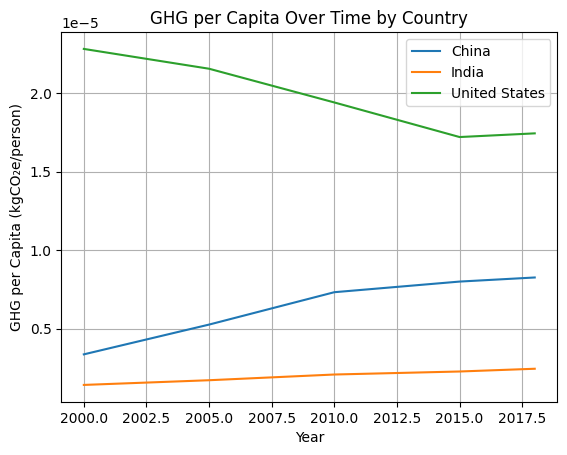

In [ ]:


# Filter data by country
countries = ghg_per_capita_df['country'].unique()

# Plot each country as a separate line
for country in countries:
    country_data = ghg_per_capita_df[ghg_per_capita_df['country'] == country]
    plt.plot(country_data['year'], country_data['ghg_per_capita'], label=country)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GHG per Capita (MtCO₂e/person)')
plt.title('GHG per Capita Over Time by Country')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
